In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

import warnings
# Adding this because a few of the things we learned in sns will be changed or removed in the future, it adds a lot of cautions.
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

In [2]:
df = pd.read_excel("/Users/anders/Documents/Skillshare/housing.xlsx")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#Checking how many datapoints there are in the dataset and the spread of "categories" on ocean_proximity
num_datapoints = df.shape[0]
print(f"The dataset contains {num_datapoints} datapoints.")

df["ocean_proximity"].value_counts()

The dataset contains 20640 datapoints.


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2289
ISLAND           5
NEAR BAY}        1
Name: count, dtype: int64

In [4]:
# I see that a } had sneaked into the CSV/Excel file. 
# The error was "NEAR BAY}"
# Because I was going to use this dataset a lot I later went in and manually removed it
# from the file with a simple search and replace in Excel.

In [5]:
df["ocean_proximity"] = df["ocean_proximity"].str.strip("}")
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

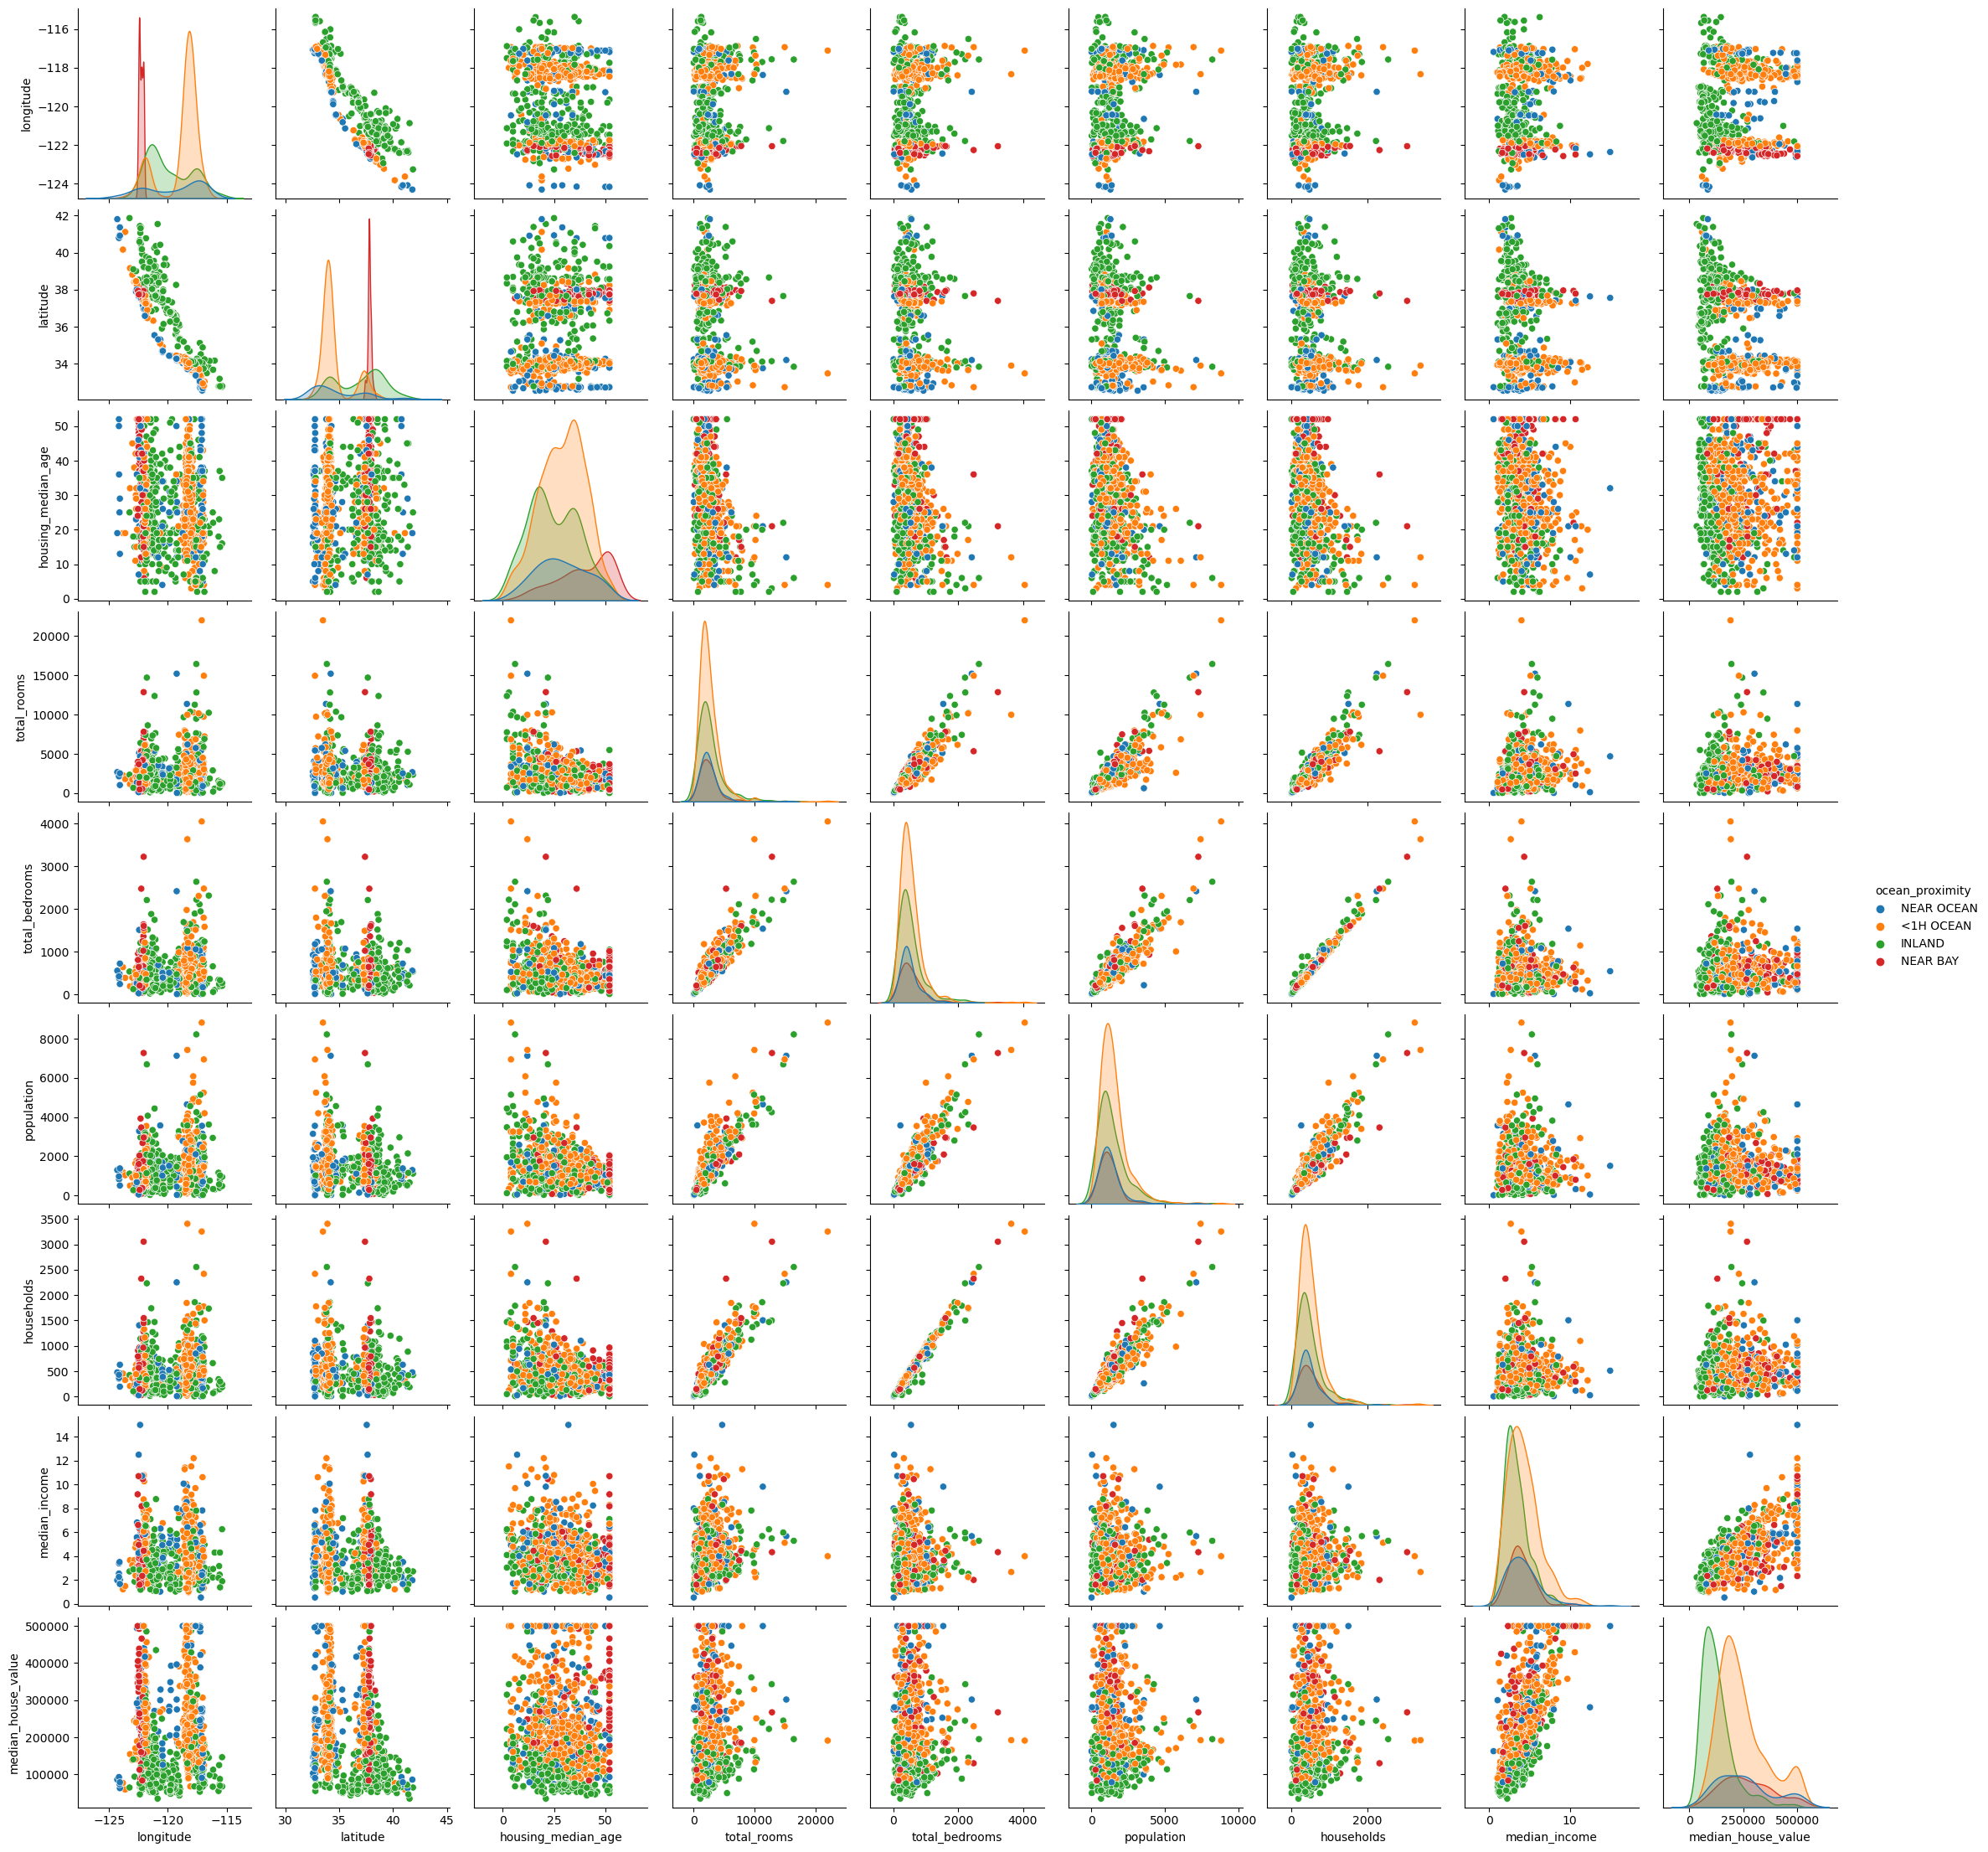

In [6]:
sns.pairplot(df.sample(1000), hue="ocean_proximity")

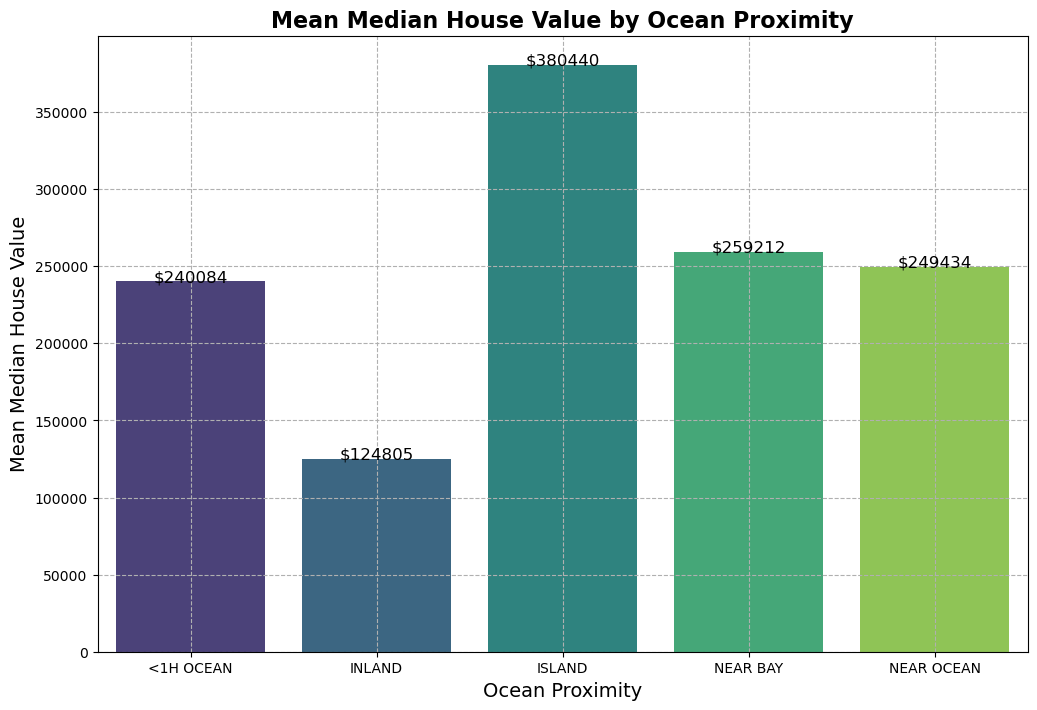

In [7]:
mean_values = df.groupby("ocean_proximity")["median_house_value"].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x="ocean_proximity", y="median_house_value", data=mean_values, palette="viridis")
plt.title("Mean Median House Value by Ocean Proximity", fontsize=16, fontweight="bold")
plt.xlabel("Ocean Proximity", fontsize=14)
plt.ylabel("Mean Median House Value", fontsize=14)

for index, row in mean_values.iterrows():
    plt.text(index, row['median_house_value'], f'${row["median_house_value"]:.0f}', color='black', ha="center", fontsize=12)

plt.grid(True, linestyle="--")
plt.show()

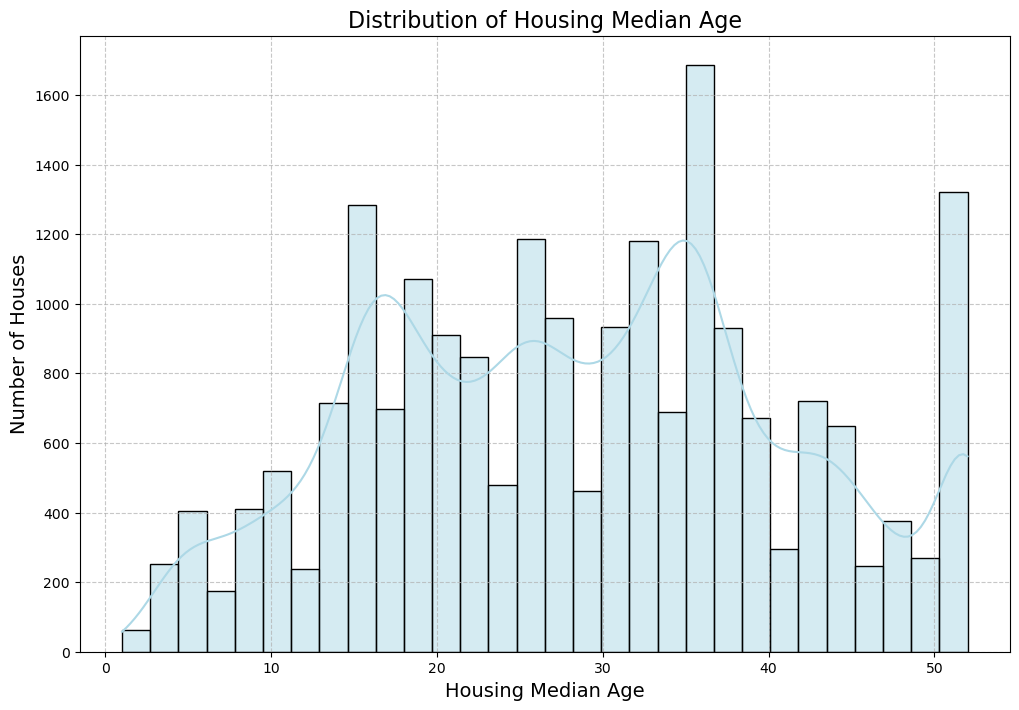

In [8]:
plt.figure(figsize=(12, 8))
sns.histplot(df['housing_median_age'], bins=30, kde=True, color='lightblue')


plt.title('Distribution of Housing Median Age', fontsize=16)
plt.xlabel('Housing Median Age', fontsize=14)
plt.ylabel('Number of Houses', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)


plt.show()

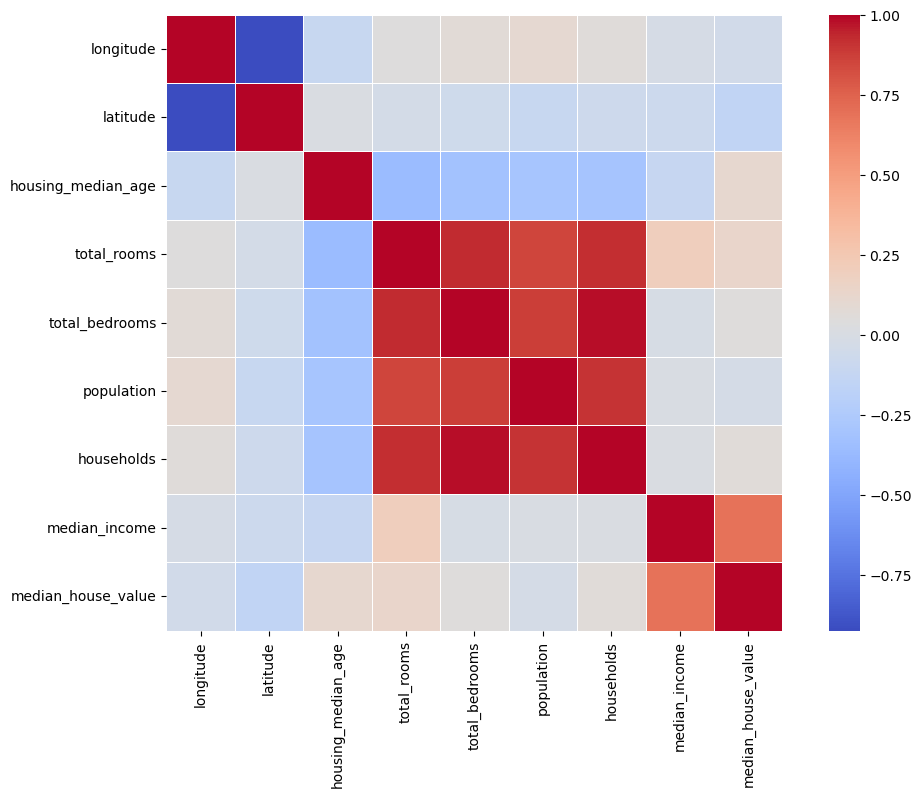

In [9]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=["number"])
corr_matrix_numeric = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_numeric, cmap="coolwarm", linewidths=0.5, square=True)
plt.show()

In [40]:
latitude_mean = df.latitude.mean()
longitude_mean = df.longitude.mean()

#Had to use -4 and +12 to get the formatting correct when converting to pdf.
m = folium.Map(location=[latitude_mean -4, longitude_mean+12],
               zoom_start=5, tiles="CartoDB Positron")

#Normally i would have used this
#m = folium.Map(location=[latitude_mean +2, longitude_mean], zoom_start=6, tiles="CartoDB Positron")

heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data, min_opacity=0.4, radius=20).add_to(m)
m